In [1]:
from qiskit import *
from qiskit.aqua import operators
from qiskit.extensions import HamiltonianGate
import numpy as np

In [2]:
from qiskit import IBMQ

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [4]:
provider = IBMQ.get_provider(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')

In [5]:
sim_backend = provider.get_backend('ibmq_valencia')

In [6]:
n_q = 4
qr = QuantumRegister(n_q)
cr = ClassicalRegister(n_q)

In [7]:
circ = QuantumCircuit(qr, cr)

In [8]:
circ.x(qr[0])

In [9]:
#defining operators
x = operators.X
y = operators.Y
z = operators.Z

In [10]:
#defining terms in the Hamiltonian

#X1X2,Y1Y2
X_12 = 0.866*x.tensor(x)
Y_12 = 0.866*y.tensor(y)

#X2X3,Y2Y3
X_23 = x.tensor(x)
Y_23 = y.tensor(y)

#X3X4,Y3Y4
X_34 = 0.866*x.tensor(x)
Y_34 = 0.866*y.tensor(y)

In [11]:
#Total evolution time
T = np.pi/2
#no.of terms in the Trotter expansion
n_t = 1
#time taken for single term
t = T/n_t

In [12]:
#looping to add terms into the Trotter expansion
for i in range(n_t):
    #appending the circuit with Hamiltonian terms
    circ.append(HamiltonianGate(X_12, t), [0,1])
    circ.append(HamiltonianGate(Y_12, t), [0,1])
    
    circ.append(HamiltonianGate(X_23, t), [1,2])
    circ.append(HamiltonianGate(Y_23, t), [1,2])
    
    circ.append(HamiltonianGate(X_34, t), [2,3])
    circ.append(HamiltonianGate(Y_34, t), [2,3])
    

In [13]:
circ.measure(qr, cr)

In [14]:
job = execute(circ, backend = sim_backend, shots = 8192)

In [15]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [16]:
from qiskit.providers.ibmq.job import IBMQJob
print(job.job_id)

<bound method IBMQJob.job_id of IBMQJob(_api=<qiskit.providers.ibmq.api.clients.account.AccountClient object at 0x7fa277deec50>, _api_status='COMPLETED', _backend=<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-hub-ntu', group='ntu-internal', project='default')>, _backend_info={'id': '5d3b17b4d84af700768d0f0a', 'name': 'ibmq_valencia'}, _cancelled=False, _creation_date=datetime.datetime(2020, 12, 22, 16, 0, 27, 21000, tzinfo=tzutc()), _error=None, _job_error_msg=None, _job_id='5fe2181bb45cc1001bd518cf', _kind=<ApiJobKind.QOBJECT_STORAGE: 'q-object-external-storage'>, _name=None, _qobj=QasmQobj(qobj_id='72c5aeeb-29d1-46b8-81ec-7e881e403517', config=QasmQobjConfig(max_credits=10, memory=False, memory_slots=4, n_qubits=5, parameter_binds=[], shots=8192), experiments=[QasmQobjExperiment(config=QasmQobjExperimentConfig(memory_slots=4, n_qubits=5), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3]], creg_sizes=[['c0', 4]], memory_slots=4, n_qubits=5, nam

In [17]:
counts = job.result().get_counts(circ)
print(counts)

{'1100': 4, '0000': 427, '0101': 132, '1011': 12, '1001': 295, '1110': 8, '1000': 18, '0111': 12, '1010': 36, '1111': 5, '0010': 802, '0100': 11, '0011': 153, '0001': 6220, '0110': 24, '1101': 33}


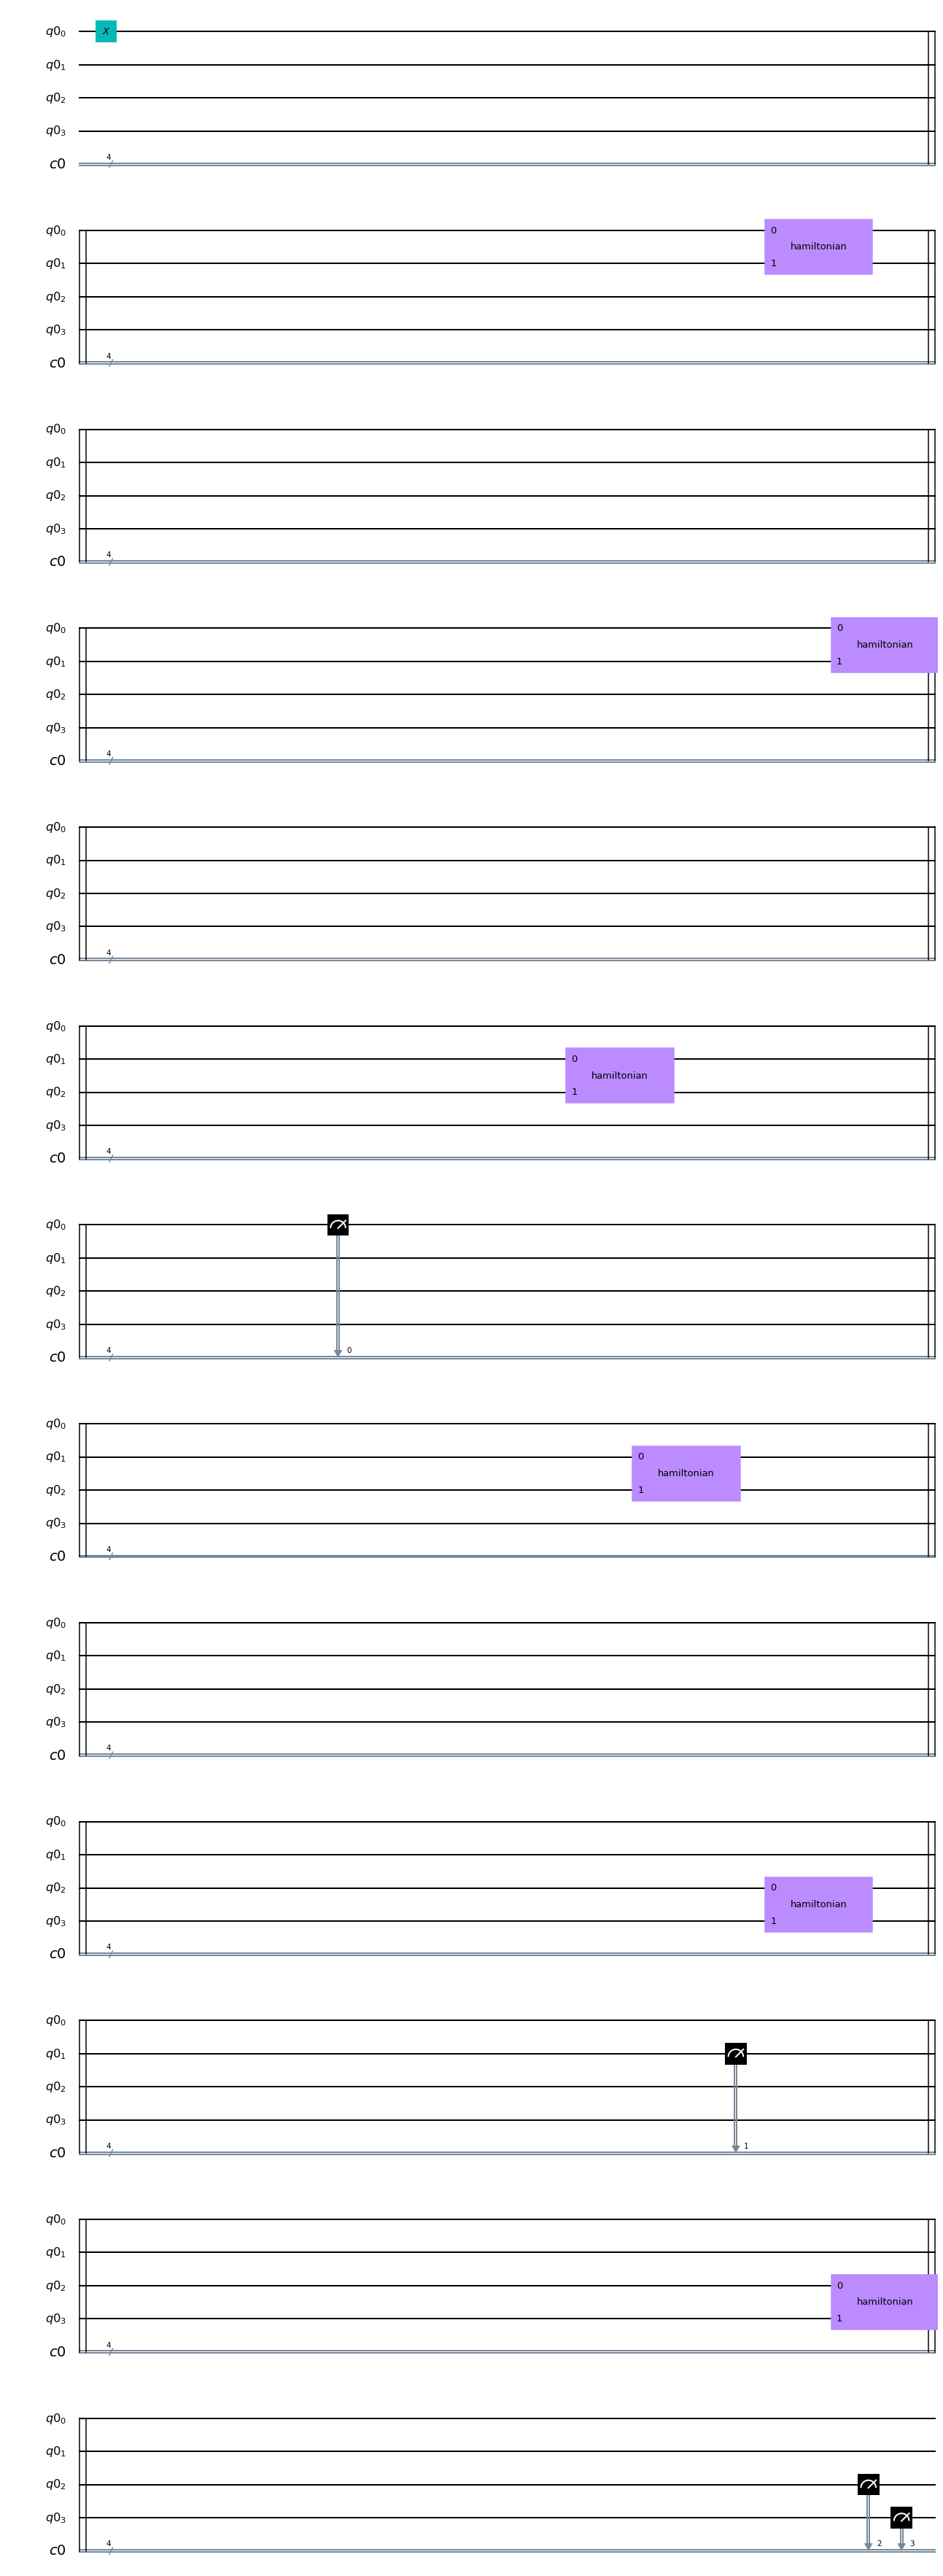

In [18]:
%matplotlib inline 
circ.draw(output= 'mpl')

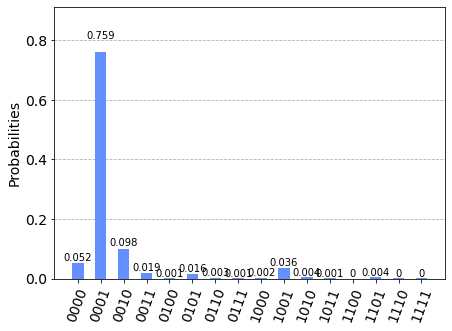

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)